# Librairies et mes fonctions

In [186]:
import pandas as pd
import seaborn as sns


import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression

#GPT
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [187]:
import sys
sys.path.append(r"C:\Users\franc\Desktop\DATA_SCIENCE\ML_PRO\DOC")
from perso import *

1. Éliminer les lignes contenant des valeurs manquantes

2. Séparer le jeu de données en X/y (y est la variable mpg et X tout le reste)

3. Séparer le jeu de données en trainset et testset (en écrivant `train_test_split(X, y)`)

4. Extraire le constructeur automobile de la variable name et mettre le résultat dans une variable "constructor" (si vous l'ignorez, mettez "other"), puis éliminer la colonne "name"

5. Encoder les catégories de la maniere la plus pertinente

6. Utiliser un Polynomial Feature de degré 2 sur les variables Acceleration, Horsepower et weight

7. Normaliser les variables cylinders, model_year, usa, et constructeur avec MinMaxScaler, et les autres variables avec un StandardScaler

8. Utiliser un selectKBest avec k=10 sur l'ensemble de vos variables

9. Dessiner un diagramme de votre pipeline

10. Mettre le tout dans une pipeline.

In [188]:
#chargement du dataset
df= sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [189]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

1. Éliminer les lignes contenant des valeurs manquantes

In [190]:
#les ddonnées nan 
nan_filtre= df.isna().any(axis=1)
nan_df=df[nan_filtre].copy()

#suppression des lignes avec nan
df.dropna(inplace=True)
# df.isna().sum() : pour verfier
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


2. Séparer le jeu de données en X/y (y est la variable mpg et X tout le reste)

In [191]:
#split du dataset

X=df.drop(columns=["mpg",])
y=df["mpg"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)


4. Extraire le constructeur automobile de la variable name et mettre le résultat dans une variable "constructor" (si vous l'ignorez, mettez "other"), puis éliminer la colonne "name"

In [192]:
#prendre le nom des constucteur et les enregistré dans constructor 
#enfin suppression de la column "name"
constructor = df["name"].str.split().str[0].str.upper()

# Prendre la colonne "name" du DataFrame
#str.split(): Découpe chaque nom en liste de mots (nb: str permet d'appliquer 
# les modifictions(split) d'un string sur chaque colone)
# Garder le premier mot de chaque liste (ex: "ford" → constructeur)
# Mettre ce mot en majuscules pour uniformiser (ex: "FORD")


df=df.drop(columns=["name",])

#dictionnaire pour remplacer 
constructors_valid = {
    "CHEVROLET", "BUICK", "PLYMOUTH", "AMC", "FORD", "PONTIAC", "DODGE",
    "TOYOTA", "DATSUN", "VOLKSWAGEN", "PEUGEOT", "AUDI", "SAAB", "BMW",
    "MERCURY", "OPEL", "FIAT", "OLDSMOBILE", "CHRYSLER", "MAZDA", "VOLVO",
    "RENAULT", "HONDA", "SUBARU", "MERCEDES", "CADILLAC", "TRIUMPH", "NISSAN"
}

constructor = constructor.apply(lambda x: x if x in constructors_valid else "OTHER")
constructor[constructor == "OTHER"]
df["constructor"]=constructor
df.query("`constructor` == 'OTHER' ").head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,constructor
26,10.0,8,307.0,200.0,4376,15.0,70,usa,OTHER
28,9.0,8,304.0,193.0,4732,18.5,70,usa,OTHER
82,23.0,4,120.0,97.0,2506,14.5,72,japan,OTHER
111,18.0,3,70.0,90.0,2124,13.5,73,japan,OTHER
161,16.0,6,250.0,105.0,3897,18.5,75,usa,OTHER


5. Encoder les catégories de la maniere la plus pertinente

In [193]:
# Création du ColumnTransformer
column_transformer0 = ColumnTransformer(
    transformers=[
        ("origin", OneHotEncoder(sparse_output=False, drop="first"), ["origin"]),
        ("constructor", OrdinalEncoder(), ["constructor"])
    ],
    remainder="passthrough"
)

# Création du pipeline
pipeline0 = Pipeline([
    ("column_transformer", column_transformer0)
])

# Fit/transform
pipeline0.fit(df)
result_pipeline0 = pipeline0.transform(df)


##########
# Récupération des noms de colonnes
columns_encoder = list(
    pipeline0.named_steps["column_transformer"]
    .transformers_[0][1]   # OneHotEncoder
    .get_feature_names_out(["origin"])  # noms des colonnes OneHot
)

# Ajout de la colonne de OrdinalEncoder manuellement
columns_encoder += ["constructor"]

# Récupérer le reste des colonnes
remainder_cols = [
    col for col in df.columns if col not in ["origin", "constructor"]
]

# Fusionner tous les noms
all_columns = columns_encoder + remainder_cols
############

# Créer le DataFrame final propre
df = pd.DataFrame(result_pipeline0, columns=all_columns)

df.head()

,origin_japan,origin_usa,constructor,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0.0,1.0,5.0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0
1,0.0,1.0,3.0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0
2,0.0,1.0,20.0,18.0,8.0,318.0,150.0,3436.0,11.0,70.0
3,0.0,1.0,0.0,16.0,8.0,304.0,150.0,3433.0,12.0,70.0
4,0.0,1.0,10.0,17.0,8.0,302.0,140.0,3449.0,10.5,70.0


In [194]:
# # on va utiliser l'OneHotEncoder ici car il n'y a pas d'ordre
# #column categorielle
# categorical_col=liste_vd(df)

# #initialisation de l'encoder (OneHotEncoder) 
# encoder = OneHotEncoder(sparse_output=False,drop='first')
# encoder.fit(df[categorical_col])

# result_encoder =encoder.transform(df[categorical_col])

# #nom des columns columns pour afficher en mode dataFrame
# # columns= []
# # for col in categorical_col:
# #     columns.extend(df[col].unique().tolist() )
# # columns

# # pd.DataFrame(result_encoder,columns=columns)
# # pd.DataFrame(result_encoder

# ## Actualisation du dataset

# df[categorical_col]=result_encoder
# df=df.drop(columns=liste_categorical)
# df.head()


6. Utiliser un Polynomial Feature de degré 2 sur les variables Acceleration, Horsepower et weight


In [195]:
#column qui vont subir PlynomialFeatures ("horsepower","weight")
liste_polynomialfeatures= ["horsepower","weight"]

#Intitialistation et entrainement de PolynomialFeatures
polynomialfeatures= PolynomialFeatures(degree= 2)
polynomialfeatures.fit(df[liste_polynomialfeatures])

result_polynomialfeatures = polynomialfeatures.transform(df[liste_polynomialfeatures] )

#columns name
polynomialfeatures_col= ["bias",'horsepower', 'weight','horsepower^2','horsepower x weight','weight^2'  ]

pd.DataFrame(result_polynomialfeatures, columns=polynomialfeatures_col )

,bias,horsepower,weight,horsepower^2,horsepower x weight,weight^2
0,1.0,130.0,3504.0,16900.0,455520.0,12278016.0
1,1.0,165.0,3693.0,27225.0,609345.0,13638249.0
2,1.0,150.0,3436.0,22500.0,515400.0,11806096.0
3,1.0,150.0,3433.0,22500.0,514950.0,11785489.0
4,1.0,140.0,3449.0,19600.0,482860.0,11895601.0
...,...,...,...,...,...,...
387,1.0,86.0,2790.0,7396.0,239940.0,7784100.0
388,1.0,52.0,2130.0,2704.0,110760.0,4536900.0
389,1.0,84.0,2295.0,7056.0,192780.0,5267025.0
390,1.0,79.0,2625.0,6241.0,207375.0,6890625.0


In [196]:
##actualiser le df 
df[polynomialfeatures_col]=result_polynomialfeatures

df=df.drop(columns=liste_polynomialfeatures)
df.head()

,origin_japan,origin_usa,constructor,mpg,cylinders,displacement,acceleration,model_year,bias,horsepower^2,horsepower x weight,weight^2
0,0.0,1.0,5.0,18.0,8.0,307.0,12.0,70.0,1.0,16900.0,455520.0,12278016.0
1,0.0,1.0,3.0,15.0,8.0,350.0,11.5,70.0,1.0,27225.0,609345.0,13638249.0
2,0.0,1.0,20.0,18.0,8.0,318.0,11.0,70.0,1.0,22500.0,515400.0,11806096.0
3,0.0,1.0,0.0,16.0,8.0,304.0,12.0,70.0,1.0,22500.0,514950.0,11785489.0
4,0.0,1.0,10.0,17.0,8.0,302.0,10.5,70.0,1.0,19600.0,482860.0,11895601.0


7. Normaliser les variables cylinders, model_year et constructeur avec MinMaxScaler, et les autres variables avec un StandardScaler


In [197]:
#les colonnes a normaliser
liste_minmax= ['cylinders','model_year']
liste_standard=df.drop(columns=liste_minmax).columns # retourne deja une liste

#creation d'une columntransformer 
column_transformer= ColumnTransformer(
    transformers=[
        ("Min_Max", MinMaxScaler(), liste_minmax ),
        ("standard", StandardScaler(), liste_standard)
    ]
)

#finalisation de la pipeline
pipeline_temp=Pipeline(
    steps= [
        ("column_transformer", column_transformer)
    ]
)
pipeline_temp


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('Min_Max', MinMaxScaler(),
                                                  ['cylinders', 'model_year']),
                                                 ('standard', StandardScaler(),
                                                  Index(['origin_japan', 'origin_usa', 'constructor', 'mpg', 'displacement',
       'acceleration', 'bias', 'horsepower^2', 'horsepower x weight',
       'weight^2'],
      dtype='object'))]))])

In [198]:
result_pipeline_temp = pipeline_temp.fit_transform(df)
pd.DataFrame(result_pipeline_temp, columns=df.columns)

,origin_japan,origin_usa,constructor,mpg,cylinders,displacement,acceleration,model_year,bias,horsepower^2,horsepower x weight,weight^2
0,1.0,0.0,-0.50239,0.774597,-0.914087,-0.698638,1.077290,-1.285258,0.0,0.459979,0.528582,0.492385
1,1.0,0.0,-0.50239,0.774597,-1.162835,-1.083498,1.488732,-1.466724,0.0,1.513418,1.227955,0.741147
2,1.0,0.0,-0.50239,0.774597,0.951526,-0.698638,1.182542,-1.648189,0.0,1.031336,0.800830,0.406079
3,1.0,0.0,-0.50239,0.774597,-1.535957,-0.955212,1.048584,-1.285258,0.0,1.031336,0.798784,0.402311
4,1.0,0.0,-0.50239,0.774597,-0.292216,-0.826925,1.029447,-1.829655,0.0,0.735454,0.652885,0.422448
...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.2,1.0,-0.50239,0.774597,-0.292216,0.455941,-0.520637,0.021294,0.0,-0.509696,-0.451563,-0.329472
388,0.2,1.0,-0.50239,-1.290994,0.702777,2.636813,-0.932079,3.287676,0.0,-0.988411,-1.038886,-0.923326
389,0.2,1.0,-0.50239,0.774597,-0.540964,1.097374,-0.568479,-1.430430,0.0,-0.544385,-0.665978,-0.789800
390,0.2,1.0,-0.50239,0.774597,-0.292216,0.584228,-0.712005,1.110088,0.0,-0.627538,-0.599621,-0.492872


In [199]:
df.head()

,origin_japan,origin_usa,constructor,mpg,cylinders,displacement,acceleration,model_year,bias,horsepower^2,horsepower x weight,weight^2
0,0.0,1.0,5.0,18.0,8.0,307.0,12.0,70.0,1.0,16900.0,455520.0,12278016.0
1,0.0,1.0,3.0,15.0,8.0,350.0,11.5,70.0,1.0,27225.0,609345.0,13638249.0
2,0.0,1.0,20.0,18.0,8.0,318.0,11.0,70.0,1.0,22500.0,515400.0,11806096.0
3,0.0,1.0,0.0,16.0,8.0,304.0,12.0,70.0,1.0,22500.0,514950.0,11785489.0
4,0.0,1.0,10.0,17.0,8.0,302.0,10.5,70.0,1.0,19600.0,482860.0,11895601.0


8. Utiliser un selectKBest avec k=10 sur l'ensemble de vos variables

In [200]:
selector= SelectKBest(score_func=f_regression,k=10)

#division du dataset actualisé
X=df.drop(columns=["mpg",])
y=df["mpg"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#resultat de la section 
result_selector_train= selector.fit_transform(X_train , y_train)
result_selector_test= selector.fit_transform(X_test , y_test)

# Résultats de la sélection pour les données d'entraînement
result_selector_train = selector.fit_transform(X_train, y_train)

X_test_selected = selector.transform(X_test) # Appliquer la même transformation à X_test

# Obtenir les colonnes sélectionnées
selected_columns = X_train.columns[selector.get_support()]

# Affichage des résultats
pd.DataFrame(result_selector_train, columns=selected_columns)

,origin_japan,origin_usa,constructor,cylinders,displacement,acceleration,model_year,horsepower^2,horsepower x weight,weight^2
0,1.0,0.0,7.0,4.0,85.0,16.8,77.0,4900.0,136150.0,3783025.0
1,0.0,1.0,20.0,6.0,225.0,17.2,78.0,10000.0,343000.0,11764900.0
2,0.0,1.0,20.0,4.0,105.0,13.2,79.0,4900.0,154000.0,4840000.0
3,0.0,1.0,10.0,6.0,200.0,17.6,76.0,6561.0,243972.0,9072144.0
4,1.0,0.0,25.0,4.0,113.0,15.5,72.0,9025.0,216410.0,5189284.0
...,...,...,...,...,...,...,...,...,...,...
308,0.0,0.0,18.0,4.0,90.0,21.7,80.0,2304.0,100080.0,4347225.0
309,0.0,1.0,0.0,6.0,232.0,17.6,76.0,8100.0,277650.0,9517225.0
310,0.0,0.0,17.0,4.0,116.0,15.5,73.0,5625.0,161850.0,4656964.0
311,0.0,1.0,10.0,6.0,250.0,14.5,71.0,7744.0,276232.0,9853321.0


## **CHATGPT**

In [201]:
# Entraîner un modèle de régression linéaire avec les données d'entraînement sélectionnées
model = LinearRegression()
model.fit(result_selector_train, y_train)

# Prédire sur les données de test sélectionnées
y_pred = model.predict(X_test_selected)

# Comparer les résultats avec y_test
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Afficher les prédictions et les vraies valeurs pour une comparaison
comparison_df = pd.DataFrame({
    'True values': y_test,
    'Predicted values': y_pred
})

print(comparison_df.head())

Mean Squared Error:  11.970257815930927
     True values  Predicted values
144         28.0         25.118093
280         22.3         26.439171
68          12.0         10.777889
372         38.0         31.193324
328         33.8         32.812693


In [202]:
# Transformer les prédictions en DataFrame
y = pd.DataFrame(y_pred, columns=["mpg_pre"])

# Réinitialiser l'index de y_test pour aligner
y["mpg"] = y_test.reset_index(drop=True)

y['tes-pred'] = y['mpg'] - y['mpg_pre']

# Affichage
y[y['tes-pred']>=2].shape


(22, 3)

In [203]:
y.shape

(79, 3)

9. Dessiner un diagramme de votre pipeline

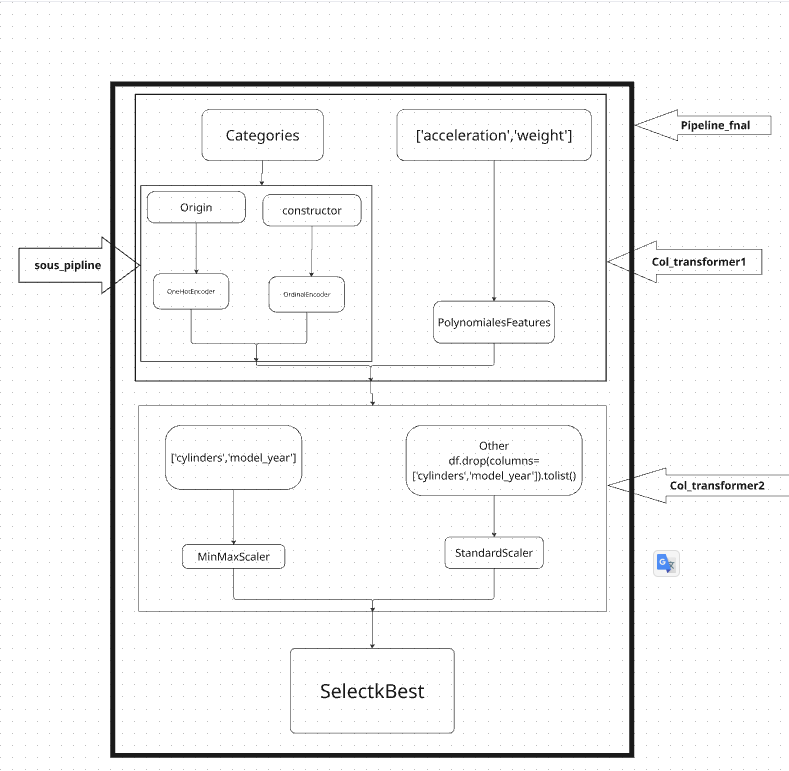

In [204]:
# chargementdu dataset "mpg"
df=sns.load_dataset("mpg")

#division du dataset
X =df.drop(columns=["mpg"])
y=df["mpg"]

#division train et test
X_train,X_test ,y_train , y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [205]:
constructor = df["name"].str.split().str[0].str.lower()

# Prendre la colonne "name" du DataFrame
#str.split(): Découpe chaque nom en liste de mots (nb: str permet d'appliquer 
# les modifictions(split) d'un string sur chaque colone)
# Garder le premier mot de chaque liste (ex: "ford" → constructeur)
# Mettre ce mot en majuscules pour uniformiser (ex: "FORD")


df=df.drop(columns=["name",])

#dictionnaire pour remplacer 
constructors_valid = {
    "CHEVROLET", "BUICK", "PLYMOUTH", "AMC", "FORD", "PONTIAC", "DODGE",
    "TOYOTA", "DATSUN", "VOLKSWAGEN", "PEUGEOT", "AUDI", "SAAB", "BMW",
    "MERCURY", "OPEL", "FIAT", "OLDSMOBILE", "CHRYSLER", "MAZDA", "VOLVO",
    "RENAULT", "HONDA", "SUBARU", "MERCEDES", "CADILLAC", "TRIUMPH", "NISSAN"
}

constructor = constructor.apply(lambda x: x if x in constructors_valid else "OTHER")
constructor[constructor == "OTHER"]

#ajout d'une colonne "constructor" au df 
df["constructor"]=constructor


df.query("`constructor` == 'OTHER' ").head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,constructor
0,18.0,8,307.0,130.0,3504,12.0,70,usa,OTHER
1,15.0,8,350.0,165.0,3693,11.5,70,usa,OTHER
2,18.0,8,318.0,150.0,3436,11.0,70,usa,OTHER
3,16.0,8,304.0,150.0,3433,12.0,70,usa,OTHER
4,17.0,8,302.0,140.0,3449,10.5,70,usa,OTHER


In [207]:
#creation de LA PIPELINE 

###############################
### 1ere partie de la  pipeline

column_transformer1=ColumnTransformer(
    transformers= [
        ("origin : OneHotEncoder",OneHotEncoder(sparse_output=False),["origin"]),
        ("constructor: OrdinalEncoder",OrdinalEncoder(),["constructor"])
    ],
    remainder= 'passthrough'
)


###############################
### 2ieme partie de la pipeline

#liste concerné
liste_minmax = ["cylinders","model_year"]
liste_standard=df.drop(columns=liste_minmax).columns.tolist()

column_transformer2=ColumnTransformer(
    transformers= [
        ("MinMax Scaler", MinMaxScaler(),liste_minmax),
        ("Standard Scaler", StandardScaler(),liste_standard)
    ],
    remainder= 'passthrough'
)

########################
#3ieme partie de pipeline et finalisation 

pipeline= Pipeline(
    steps=[
        ("Encodage",column_transformer1),
        ("Normalisation",column_transformer2),
        ("Select KBest", SelectKBest(score_func=f_regression,k=10))
    ]
)

In [208]:
#remettre les noms des columns modifié apres la premiere partie du dataset 

# Récupération des noms de colonnes
columns_encoder = list(
    pipeline0.named_steps["column_transformer"]
    .transformers_[0][1]   # OneHotEncoder
    .get_feature_names_out(["origin"])  # noms des colonnes OneHot
) + ["constructor"]


# Récupérer le reste des colonnes
remainder_cols = [
    col for col in df.columns if col not in ["origin", "constructor"]
]

# Fusionner tous les noms
all_columns = columns_encoder + remainder_cols


# Créer le DataFrame final propre
df = pd.DataFrame(result_pipeline0, columns=all_columns)






In [ ]:
#creation de LA PIPELINE 

###############################
### 1ere partie de la  pipeline

cat_pipeline=Pipeline(
    steps=[
        ("origin : OneHotEncoder",OneHotEncoder(sparse_output=False),["origin"]),
        ("constructor: OrdinalEncoder",OrdinalEncoder(),["constructor"])
    ],
)


column_transformer1=ColumnTransformer(
    transformers= [
        ("categories",cat_pipeline,),
        ("constructor: OrdinalEncoder",OrdinalEncoder(),["constructor"])
    ],
    remainder= 'passthrough'
)

pipeline1=Pipeline(
    steps=[
        
    ]
)
##
#remettre les noms des columns modifié apres la premiere partie du dataset 

# Récupération des noms de colonnes
columns_encoder = list(
    pipeline0.named_steps["column_transformer"]
    .transformers_[0][1]   # OneHotEncoder
    .get_feature_names_out(["origin"])  # noms des colonnes OneHot
) + ["constructor"]


# Récupérer le reste des colonnes
remainder_cols = [
    col for col in df.columns if col not in ["origin", "constructor"]
]

# Fusionner tous les noms
all_columns = columns_encoder + remainder_cols


# Créer le DataFrame final propre
df = pd.DataFrame(result_pipeline0, columns=all_columns)

##


###############################
### 2ieme partie de la pipeline

#liste concerné
liste_minmax = ["cylinders","model_year"]
liste_standard=df.drop(columns=liste_minmax).columns.tolist()

column_transformer2=ColumnTransformer(
    transformers= [
        ("MinMax Scaler", MinMaxScaler(),liste_minmax),
        ("Standard Scaler", StandardScaler(),liste_standard)
    ],
    remainder= 'passthrough'
)

########################
#3ieme partie de pipeline et finalisation 

pipeline= Pipeline(
    steps=[
        ("Encodage",column_transformer1),
        ("Normalisation",column_transformer2),
        ("Select KBest", SelectKBest(score_func=f_regression,k=10))
    ]
)

In [210]:

# Exemple de colonnes
cat_origin = ['Origin']
cat_constructor = ['constructor']
poly_features = ['acceleration', 'weight']
minmax_features = ['cylinders', 'model_year']
# Other: on les détectera dynamiquement à partir du DataFrame

# Sous pipeline pour les catégories
sous_pipeline = ColumnTransformer([
    ('origin_ohe', OneHotEncoder(), cat_origin),
    ('constructor_ord', OrdinalEncoder(), cat_constructor)
])

# Pipeline pour les features polynomial
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures())
])

# Transformer 1 : catégories et polynomial
col_transformer1 = ColumnTransformer([
    ('cat_pipe', sous_pipeline, cat_origin + cat_constructor),
    ('poly', poly_pipeline, poly_features)
])

### Transformer 2 : Normalisation zone

#liste concerné
liste_minmax = ["cylinders","model_year"]
liste_standard=df.drop(columns=liste_minmax).columns.tolist()

column_transformer2=ColumnTransformer(
    transformers= [
        ("MinMax Scaler", MinMaxScaler(),liste_minmax),
        ("Standard Scaler", StandardScaler(),liste_standard)
    ],
    remainder= 'passthrough'
)

########################
#3ieme partie de pipeline et finalisation 

pipeline= Pipeline(
    steps=[
        ("Encodage",column_transformer1),
        ("Normalisation",column_transformer2),
        ("Select KBest", SelectKBest(score_func=f_regression,k=10))
    ]
)

